In [1]:
import warnings

#suppress warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from math import sqrt
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

from xgboost import XGBRegressor

In [68]:
raw_data = pd.read_csv('NashvilleData.csv')
df = raw_data.copy()
df.drop(columns=['LandUse','SaleDate'],inplace=True)
df

,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,...,ValueDiffFromMonthlyAvg,ValueDiffFromCityAnnualAvg,ValueDiffFromCityMonthlyAvg,CityAnnualAvgSalePrice,CityMonthlyAvgSalePrice,IntrinsicValue,TotalRooms,ValueperRoom,ValuePerAcre,CityAvgAcre
0,1365000.0,1,1.99,280800.0,1184700.0,1465500.0,2006.0,4.0,4.0,1.0,...,1.205211e+06,1.004302e+06,0.000000,292749.619048,567561.538462,0.0,8.5,172411.764706,7.364322e+05,1.320098
1,50000.0,1,0.17,45000.0,48200.0,93200.0,1918.0,3.0,1.0,0.0,...,-1.670888e+05,-1.906752e+05,-183425.433526,261786.504879,232152.929032,0.0,4.0,23300.000000,5.482353e+05,0.465064
2,135000.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,261786.504879,232152.929032,NaN,NaN,NaN,NaN,0.465064
3,225000.0,1,0.18,140000.0,83400.0,245200.0,1940.0,2.0,1.0,0.0,...,-1.508883e+04,-3.867523e+04,-31425.433526,261786.504879,232152.929032,21800.0,3.0,81733.333333,1.362222e+06,0.465064
4,51200.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111732.901198,96256.875000,NaN,NaN,NaN,NaN,0.625309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56368,409900.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,341080.548150,375432.561614,NaN,NaN,NaN,NaN,0.465064
56369,160000.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,341080.548150,375432.561614,NaN,NaN,NaN,NaN,0.465064
56370,245000.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,341080.548150,375432.561614,NaN,NaN,NaN,NaN,0.465064
56371,118500.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,118500.000000,118500.000000,NaN,NaN,NaN,NaN,0.430146


In [69]:
df['SoldAsVacant'] = df['SoldAsVacant'].astype(int)
features = np.log(df.iloc[:,1:].drop(columns='City')+1)
features.replace([np.inf, -np.inf], np.nan,inplace=True)
categories = pd.get_dummies(df['City'])
target = df['SalePrice']
imputer = SimpleImputer(strategy='mean')
features = pd.DataFrame(imputer.fit_transform(features),columns=features.columns)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features,columns=features.columns)
X = pd.concat([scaled_features,categories],axis=1)
y = target

,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,Age_of_House,...,GOODLETTSVILLE,HERMITAGE,JOELTON,MADISON,MOUNT JULIET,NASHVILLE,NOLENSVILLE,OLD HICKORY,UNKNOWN,WHITES CREEK
0,1.0,0.213991,0.775960,0.853874,0.809670,0.952188,0.647685,0.671188,0.500000,0.386521,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.028994,0.596805,0.658380,0.576873,0.559984,0.557886,0.289065,0.000000,0.848408,...,0,0,0,0,0,1,0,0,0,0
2,1.0,0.063796,0.581545,0.667464,0.620737,0.765201,0.558260,0.421305,0.138475,0.689716,...,0,0,0,0,0,1,0,0,0,0
3,1.0,0.030672,0.707858,0.691856,0.658605,0.659696,0.442114,0.289065,0.000000,0.800027,...,0,0,0,0,0,1,0,0,0,0
4,1.0,0.063796,0.581545,0.667464,0.620737,0.765201,0.558260,0.421305,0.138475,0.689716,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56368,1.0,0.063796,0.581545,0.667464,0.620737,0.765201,0.558260,0.421305,0.138475,0.689716,...,0,0,0,0,0,1,0,0,0,0
56369,1.0,0.063796,0.581545,0.667464,0.620737,0.765201,0.558260,0.421305,0.138475,0.689716,...,0,0,0,0,0,1,0,0,0,0
56370,1.0,0.063796,0.581545,0.667464,0.620737,0.765201,0.558260,0.421305,0.138475,0.689716,...,0,0,0,0,0,1,0,0,0,0
56371,1.0,0.063796,0.581545,0.667464,0.620737,0.765201,0.558260,0.421305,0.138475,0.689716,...,0,0,0,0,0,0,0,0,0,0


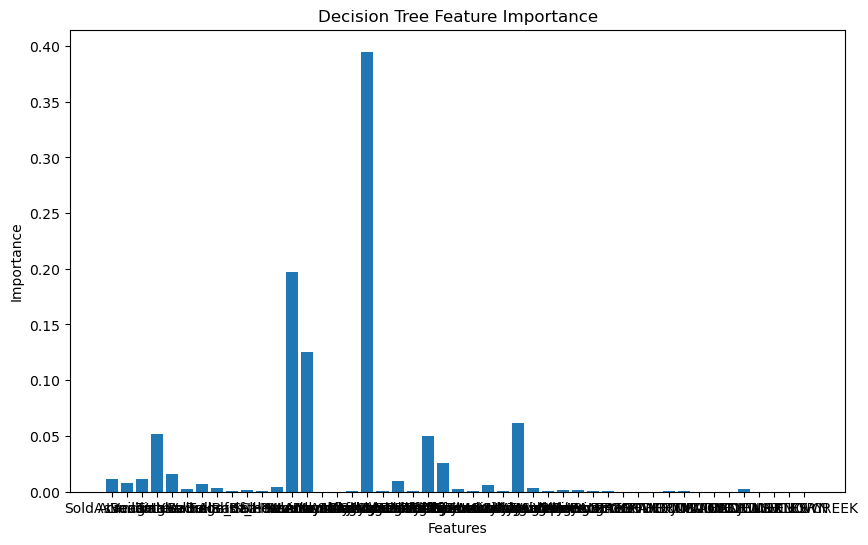

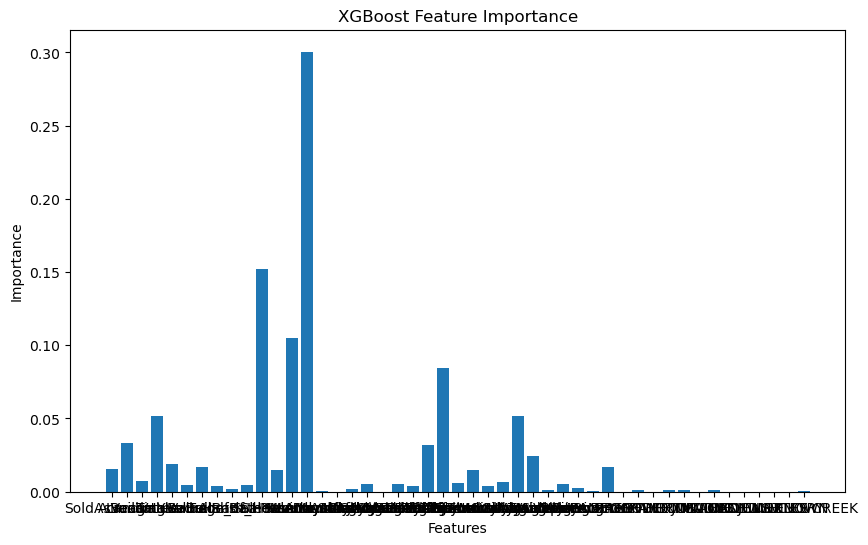

In [70]:
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X, y)

# XGB Regressor
xgb_model = XGBRegressor(random_state=0)
xgb_model.fit(X, y)

# Feature Importance Plot for Decision Tree
plt.figure(figsize=(10, 6))
plt.bar(X.columns, dt_model.feature_importances_)
plt.title('Decision Tree Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Feature Importance Plot for XGB Regressor
plt.figure(figsize=(10, 6))
plt.bar(X.columns, xgb_model.feature_importances_)
plt.title('XGBoost Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [71]:
dt_importances = pd.DataFrame({'Feature': X.columns, 'Importance': dt_model.feature_importances_})
dt_importances = dt_importances.sort_values(by='Importance', ascending=False)
print('Decision Tree Feature Importance:')
print(dt_importances)

# Feature Importance for XGB Regressor
xgb_importances = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
xgb_importances = xgb_importances.sort_values(by='Importance', ascending=False)
print('\nXGBoost Feature Importance:')
print(xgb_importances)

Decision Tree Feature Importance:
                        Feature    Importance
17          MonthlyAvgSalePrice  3.949382e-01
12                      SaleDay  1.969605e-01
13                PreviousSales  1.250528e-01
27      CityMonthlyAvgSalePrice  6.169754e-02
3                 BuildingValue  5.199052e-02
21     CityMonthlyAvgTotalValue  5.005735e-02
22       ValueDiffFromAnnualAvg  2.525554e-02
4                    TotalValue  1.578806e-02
2                     LandValue  1.154982e-02
0                  SoldAsVacant  1.151918e-02
19         MonthlyAvgTotalValue  9.521781e-03
1                       Acreage  8.112372e-03
6                      Bedrooms  7.034482e-03
25  ValueDiffFromCityMonthlyAvg  5.758644e-03
11                    SaleMonth  4.134946e-03
7                      FullBath  2.929681e-03
28               IntrinsicValue  2.922813e-03
5                     YearBuilt  2.204690e-03
23      ValueDiffFromMonthlyAvg  1.968398e-03
42                    NASHVILLE  1.951634e-03


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)

# XGB Regressor
xgb_model = XGBRegressor(random_state=0)
xgb_model.fit(X_train, y_train)

# Predictions
dt_preds = dt_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Model Evaluation
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

# Evaluate Decision Tree Regressor
dt_rmse, dt_mae, dt_mape = evaluate_model(y_test, dt_preds)
print('\nDecision Tree Regressor Metrics:')
print(f'RMSE: {dt_rmse:.2f}')
print(f'MAE: {dt_mae:.2f}')
print(f'MAPE: {dt_mape:.2f}%')

# Evaluate XGB Regressor
xgb_rmse, xgb_mae, xgb_mape = evaluate_model(y_test, xgb_preds)
print('\nXGBoost Regressor Metrics:')
print(f'RMSE: {xgb_rmse:.2f}')
print(f'MAE: {xgb_mae:.2f}')
print(f'MAPE: {xgb_mape:.2f}%')



Decision Tree Regressor Metrics:
RMSE: 490207.81
MAE: 133952.15
MAPE: 65.09%

XGBoost Regressor Metrics:
RMSE: 498802.38
MAE: 140666.19
MAPE: 76.18%


In [82]:
scaler = StandardScaler()
pca_df = pd.concat([X,y],axis=1)
scaled_data = scaler.fit_transform(pca_df)

n_components = 15
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)
cumulative_variance = np.cumsum(explained_variance_ratio)
selected_components = np.argmax(cumulative_variance >= 0.80) + 1  # Adjust threshold as needed


Explained Variance Ratio: [0.12039976 0.08682206 0.06943582 0.04687991 0.04421943 0.04235735
 0.03320086 0.03254405 0.02840334 0.02686361 0.02514533 0.0238874
 0.02238021 0.02193277 0.02158123]


In [80]:
np.argsort(np.abs(first_pc_loadings))[::-1][:15]

array([ 4,  2, 30, 24, 29, 25,  7, 21, 31, 23, 22, 20,  6, 42, 26],
      dtype=int64)

In [77]:
df

,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,...,ValueDiffFromMonthlyAvg,ValueDiffFromCityAnnualAvg,ValueDiffFromCityMonthlyAvg,CityAnnualAvgSalePrice,CityMonthlyAvgSalePrice,IntrinsicValue,TotalRooms,ValueperRoom,ValuePerAcre,CityAvgAcre
0,1365000.0,1,1.99,280800.0,1184700.0,1465500.0,2006.0,4.0,4.0,1.0,...,1.205211e+06,1.004302e+06,0.000000,292749.619048,567561.538462,0.0,8.5,172411.764706,7.364322e+05,1.320098
1,50000.0,1,0.17,45000.0,48200.0,93200.0,1918.0,3.0,1.0,0.0,...,-1.670888e+05,-1.906752e+05,-183425.433526,261786.504879,232152.929032,0.0,4.0,23300.000000,5.482353e+05,0.465064
2,135000.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,261786.504879,232152.929032,NaN,NaN,NaN,NaN,0.465064
3,225000.0,1,0.18,140000.0,83400.0,245200.0,1940.0,2.0,1.0,0.0,...,-1.508883e+04,-3.867523e+04,-31425.433526,261786.504879,232152.929032,21800.0,3.0,81733.333333,1.362222e+06,0.465064
4,51200.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111732.901198,96256.875000,NaN,NaN,NaN,NaN,0.625309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56368,409900.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,341080.548150,375432.561614,NaN,NaN,NaN,NaN,0.465064
56369,160000.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,341080.548150,375432.561614,NaN,NaN,NaN,NaN,0.465064
56370,245000.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,341080.548150,375432.561614,NaN,NaN,NaN,NaN,0.465064
56371,118500.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,118500.000000,118500.000000,NaN,NaN,NaN,NaN,0.430146


In [ ]:
loadings  = pca.components_
# Get loadings for the first principal component
first_pc_loadings = loadings[0, :]

# Get the indices of the top N features based on absolute loading values
top_n_features_indices = np.argsort(np.abs(first_pc_loadings))[::-1][:15]

# Get the names of the top N features
top_n_features = df.columns[top_n_features_indices]

print("Top {} features for the first principal component:".format(15))
print(top_n_features)


In [10]:
features.isnull().sum()

SoldAsVacant                   0
Acreage                        0
LandValue                      0
BuildingValue                  0
TotalValue                     0
YearBuilt                      0
Bedrooms                       0
FullBath                       0
HalfBath                       0
Age_of_House                   0
SaleYear                       0
SaleMonth                      0
SaleDay                        0
PreviousSales                  0
MonthlyInflation               0
AnnualInflation                0
AnnualAvgSalePrice             0
MonthlyAvgSalePrice            0
AnnualAvgTotalValue            0
MonthlyAvgTotalValue           0
CityAnnualAvgTotalValue        0
CityMonthlyAvgTotalValue       0
ValueDiffFromAnnualAvg         0
ValueDiffFromMonthlyAvg        0
ValueDiffFromCityAnnualAvg     0
ValueDiffFromCityMonthlyAvg    0
CityAnnualAvgSalePrice         0
CityMonthlyAvgSalePrice        0
IntrinsicValue                 0
TotalRooms                     0
ValueperRo

In [11]:
features = features[top_n_features]
features.replace([np.inf, -np.inf], 0, inplace=True)
#categories = pd.get_dummies(df['City'])
target = df['SalePrice']
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)
#X = pd.concat([scaled_features, categories], axis=1)
X = scaled_features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)

# XGB Regressor
xgb_model = XGBRegressor(random_state=0)
xgb_model.fit(X_train, y_train)

# Predictions
dt_preds = dt_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Model Evaluation
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

# Evaluate Decision Tree Regressor
dt_rmse, dt_mae, dt_mape = evaluate_model(y_test, dt_preds)
print('\nDecision Tree Regressor Metrics:')
print(f'RMSE: {dt_rmse:.2f}')
print(f'MAE: {dt_mae:.2f}')
print(f'MAPE: {dt_mape:.2f}%')

# Evaluate XGB Regressor
xgb_rmse, xgb_mae, xgb_mape = evaluate_model(y_test, xgb_preds)
print('\nXGBoost Regressor Metrics:')
print(f'RMSE: {xgb_rmse:.2f}')
print(f'MAE: {xgb_mae:.2f}')
print(f'MAPE: {xgb_mape:.2f}%')



Decision Tree Regressor Metrics:
RMSE: 793274.81
MAE: 185595.60
MAPE: 89.08%

XGBoost Regressor Metrics:
RMSE: 788939.40
MAE: 178455.00
MAPE: 85.20%


In [12]:
raw_data = pd.read_csv('NashvilleData.csv')
df = raw_data.copy()
df.drop(columns=['LandUse','SaleDate'],inplace=True)
df['SoldAsVacant'] = df['SoldAsVacant'].astype(int)
imputer = IterativeImputer()
imp_col = ['SoldAsVacant', 'Acreage', 'LandValue', 'BuildingValue',
       'TotalValue', 'YearBuilt', 'Bedrooms', 'FullBath', 'HalfBath',
       'Age_of_House', 'SaleYear', 'SaleMonth', 'SaleDay']
features_imputed = pd.DataFrame(imputer.fit_transform(df[imp_col]), columns=imp_col)
df[imp_col] = features_imputed.copy()
df['MonthlyInflation'] = df.groupby(['SaleYear', 'SaleMonth'])['SalePrice'].transform('mean').pct_change()
df['AnnualInflation'] = df.groupby(['SaleYear'])['SalePrice'].transform('mean').pct_change()
df['AnnualAvgSalePrice'] = df.groupby(['SaleYear'])['SalePrice'].transform('mean')
df['MonthlyAvgSalePrice'] = df.groupby(['SaleYear', 'SaleMonth'])['SalePrice'].transform('mean')
df['AnnualAvgTotalValue'] = df.groupby(['SaleYear'])['TotalValue'].transform('mean')
df['MonthlyAvgTotalValue'] = df.groupby(['SaleYear', 'SaleMonth'])['TotalValue'].transform('mean')
df['CityAnnualAvgTotalValue'] = df.groupby(['City', 'SaleYear'])['TotalValue'].transform('mean')
df['CityMonthlyAvgTotalValue'] = df.groupby(['City', 'SaleYear', 'SaleMonth'])['TotalValue'].transform('mean')
df['ValueDiffFromAnnualAvg'] = df['TotalValue'] - df['AnnualAvgTotalValue']
df['ValueDiffFromMonthlyAvg'] = df['TotalValue'] - df['MonthlyAvgTotalValue']
df['ValueDiffFromCityAnnualAvg'] = df['TotalValue'] - df['CityAnnualAvgTotalValue']
df['ValueDiffFromCityMonthlyAvg'] = df['TotalValue'] - df['CityMonthlyAvgTotalValue']
df['CityAnnualAvgSalePrice'] = df.groupby(['City', 'SaleYear'])['SalePrice'].transform('mean')
df['CityMonthlyAvgSalePrice'] = df.groupby(['City', 'SaleYear', 'SaleMonth'])['SalePrice'].transform('mean')
df['IntrinsicValue'] = df['TotalValue'] - (df['BuildingValue'] + df['LandValue'])
df['TotalRooms'] = df['Bedrooms'] + df['FullBath'] + 0.5*df['HalfBath']
df['ValueperRoom'] = df['TotalValue']/df['TotalRooms']
df['ValuePerAcre'] = df['TotalValue']/df['Acreage']
df['CityAvgAcre'] = df.groupby('City')['Acreage'].transform('mean')
df.fillna(0,inplace=True)
features = df.iloc[:, 1:].drop(columns='City').astype(float)
features.replace([np.inf, -np.inf], 0, inplace=True)
categories = pd.get_dummies(df['City'])
target = df['SalePrice']
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)
X = pd.concat([scaled_features, categories], axis=1)
y = target

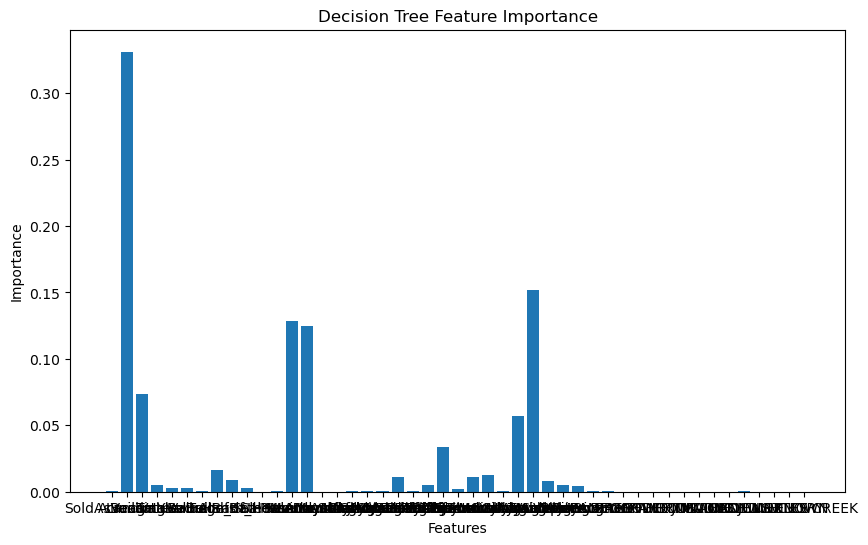

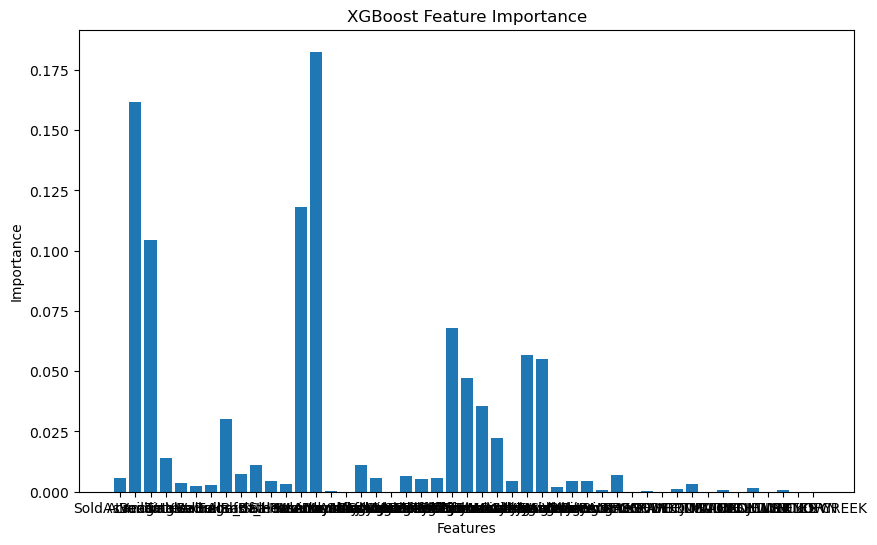

In [13]:
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X, y)

# XGB Regressor
xgb_model = XGBRegressor(random_state=0)
xgb_model.fit(X, y)

# Feature Importance Plot for Decision Tree
plt.figure(figsize=(10, 6))
plt.bar(X.columns, dt_model.feature_importances_)
plt.title('Decision Tree Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Feature Importance Plot for XGB Regressor
plt.figure(figsize=(10, 6))
plt.bar(X.columns, xgb_model.feature_importances_)
plt.title('XGBoost Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [14]:
dt_importances = pd.DataFrame({'Feature': X.columns, 'Importance': dt_model.feature_importances_})
dt_importances = dt_importances.sort_values(by='Importance', ascending=False)
print('Decision Tree Feature Importance:')
print(dt_importances)

# Feature Importance for XGB Regressor
xgb_importances = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
xgb_importances = xgb_importances.sort_values(by='Importance', ascending=False)
print('\nXGBoost Feature Importance:')
print(xgb_importances)

Decision Tree Feature Importance:
                        Feature    Importance
1                       Acreage  3.313149e-01
28               IntrinsicValue  1.514242e-01
12                      SaleDay  1.287778e-01
13                PreviousSales  1.249646e-01
2                     LandValue  7.332913e-02
27      CityMonthlyAvgSalePrice  5.660537e-02
22       ValueDiffFromAnnualAvg  3.366188e-02
7                      FullBath  1.595853e-02
25  ValueDiffFromCityMonthlyAvg  1.284863e-02
19         MonthlyAvgTotalValue  1.117168e-02
24   ValueDiffFromCityAnnualAvg  1.065108e-02
8                      HalfBath  8.937427e-03
29                   TotalRooms  7.893663e-03
21     CityMonthlyAvgTotalValue  4.960815e-03
30                 ValueperRoom  4.813042e-03
3                 BuildingValue  4.732132e-03
31                 ValuePerAcre  4.417872e-03
4                    TotalValue  2.842619e-03
9                  Age_of_House  2.734211e-03
5                     YearBuilt  2.573731e-03


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)

# XGB Regressor
xgb_model = XGBRegressor(random_state=0)
xgb_model.fit(X_train, y_train)

# Predictions
dt_preds = dt_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Model Evaluation
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

# Evaluate Decision Tree Regressor
dt_rmse, dt_mae, dt_mape = evaluate_model(y_test, dt_preds)
print('\nDecision Tree Regressor Metrics:')
print(f'RMSE: {dt_rmse:.2f}')
print(f'MAE: {dt_mae:.2f}')
print(f'MAPE: {dt_mape:.2f}%')

# Evaluate XGB Regressor
xgb_rmse, xgb_mae, xgb_mape = evaluate_model(y_test, xgb_preds)
print('\nXGBoost Regressor Metrics:')
print(f'RMSE: {xgb_rmse:.2f}')
print(f'MAE: {xgb_mae:.2f}')
print(f'MAPE: {xgb_mape:.2f}%')



Decision Tree Regressor Metrics:
RMSE: 500717.01
MAE: 135486.34
MAPE: 68.34%

XGBoost Regressor Metrics:
RMSE: 483262.33
MAE: 130336.11
MAPE: 70.52%


In [16]:
scaler = StandardScaler()
pca_df = pd.concat([X,y],axis=1)
scaled_data = scaler.fit_transform(pca_df)

n_components = 20
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)
cumulative_variance = np.cumsum(explained_variance_ratio)
selected_components = np.argmax(cumulative_variance >= 0.80) + 1  # Adjust threshold as needed


Explained Variance Ratio: [0.18333378 0.0937859  0.08228412 0.04635584 0.03971    0.03465844
 0.02924905 0.02697869 0.02480431 0.024309   0.023032   0.02213855
 0.02201315 0.02169973 0.02120948 0.02108105 0.02090847 0.02087069
 0.02083962 0.02083307]


In [17]:
selected_components

20

In [18]:
reduced_features = principal_components[:, :selected_components]
reduced_features

array([[ 1.71568812e+01,  1.63233565e+00, -1.48792570e+00, ...,
         2.96725007e-01,  7.37362494e-02, -4.62882125e-02],
       [-2.44540059e+00, -2.76528007e+00, -1.40993691e+00, ...,
        -4.55067430e-02, -1.76164966e-01, -6.25729529e-02],
       [ 7.11312100e-01, -2.30803187e+00, -2.59780047e+00, ...,
         9.18722544e-05, -1.56300235e-01, -9.76975111e-02],
       ...,
       [-4.29772959e-01,  7.30950309e-01,  2.31682043e+00, ...,
         4.11494934e-03,  1.69881997e-01,  3.71648921e-02],
       [-8.68285660e-01,  8.34562368e+00,  4.71820626e+00, ...,
        -8.63287175e-02,  6.63255193e-02,  5.56952359e-02],
       [-3.10602116e+00,  9.73749245e+00,  4.15342125e+00, ...,
        -2.33664110e-01,  1.42395950e-01, -2.56474962e-02]])

In [19]:
loadings  = pca.components_
# Get loadings for the first principal component
first_pc_loadings = loadings[0, :]

# Get the indices of the top N features based on absolute loading values
top_n_features_indices = np.argsort(np.abs(first_pc_loadings))[::-1][:15]

# Get the names of the top N features
top_n_features = df.columns[top_n_features_indices]

print("Top {} features for the first principal component:".format(15))
print(top_n_features)


Top 15 features for the first principal component:
Index(['BuildingValue', 'CityAnnualAvgTotalValue', 'CityMonthlyAvgTotalValue',
       'ValueDiffFromAnnualAvg', 'ValueDiffFromMonthlyAvg', 'LandValue',
       'IntrinsicValue', 'Acreage', 'CityMonthlyAvgSalePrice', 'Bedrooms',
       'YearBuilt', 'CityAnnualAvgSalePrice', 'TotalRooms', 'FullBath',
       'MonthlyAvgTotalValue'],
      dtype='object')


In [20]:
features = features[top_n_features]
features.replace([np.inf, -np.inf], 0, inplace=True)
#categories = pd.get_dummies(df['City'])
target = df['SalePrice']
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)
#X = pd.concat([scaled_features, categories], axis=1)
X = scaled_features
y = target

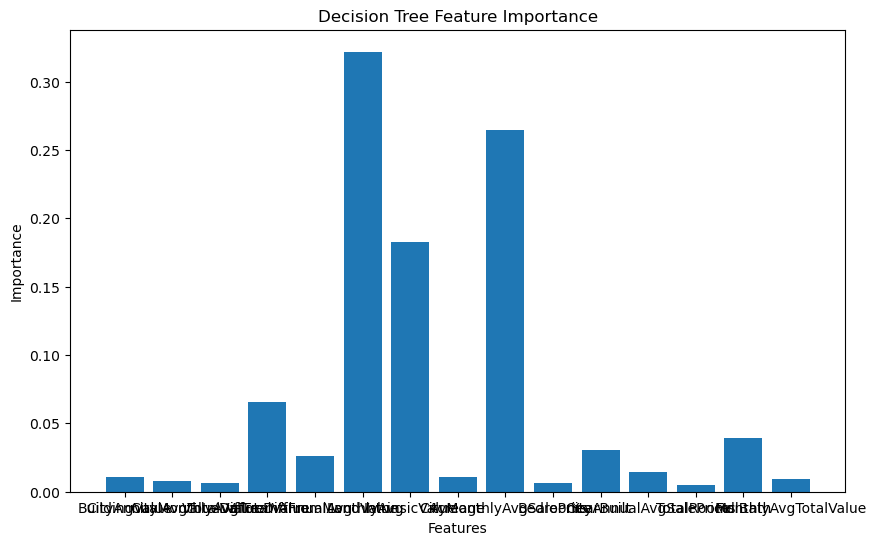

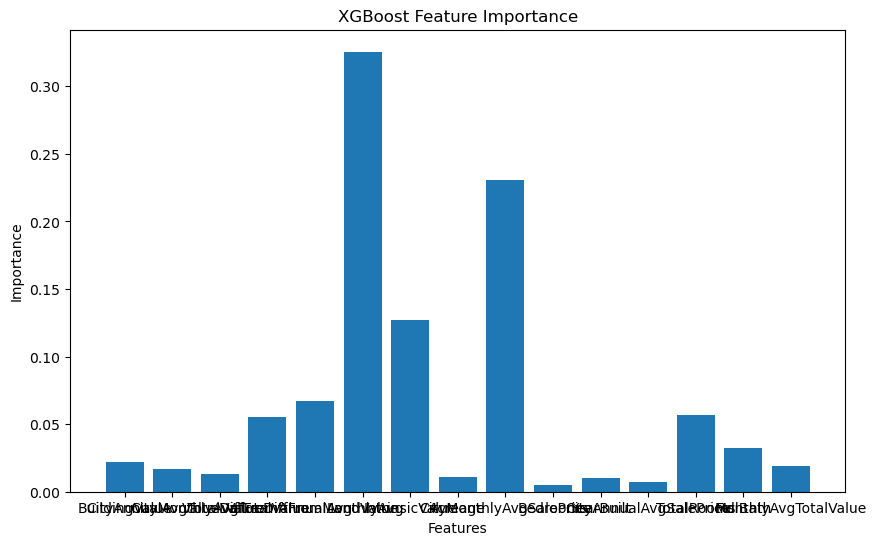

In [21]:
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X, y)

# XGB Regressor
xgb_model = XGBRegressor(random_state=0)
xgb_model.fit(X, y)

# Feature Importance Plot for Decision Tree
plt.figure(figsize=(10, 6))
plt.bar(X.columns, dt_model.feature_importances_)
plt.title('Decision Tree Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Feature Importance Plot for XGB Regressor
plt.figure(figsize=(10, 6))
plt.bar(X.columns, xgb_model.feature_importances_)
plt.title('XGBoost Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [22]:
dt_importances = pd.DataFrame({'Feature': X.columns, 'Importance': dt_model.feature_importances_})
dt_importances = dt_importances.sort_values(by='Importance', ascending=False)
print('Decision Tree Feature Importance:')
print(dt_importances)

# Feature Importance for XGB Regressor
xgb_importances = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
xgb_importances = xgb_importances.sort_values(by='Importance', ascending=False)
print('\nXGBoost Feature Importance:')
print(xgb_importances)

Decision Tree Feature Importance:
                     Feature  Importance
5                  LandValue    0.321840
8    CityMonthlyAvgSalePrice    0.264354
6             IntrinsicValue    0.182698
3     ValueDiffFromAnnualAvg    0.065956
13                  FullBath    0.039172
10                 YearBuilt    0.030165
4    ValueDiffFromMonthlyAvg    0.025841
11    CityAnnualAvgSalePrice    0.014271
0              BuildingValue    0.010444
7                    Acreage    0.010434
14      MonthlyAvgTotalValue    0.009214
1    CityAnnualAvgTotalValue    0.007840
9                   Bedrooms    0.006562
2   CityMonthlyAvgTotalValue    0.006191
12                TotalRooms    0.005019

XGBoost Feature Importance:
                     Feature  Importance
5                  LandValue    0.325582
8    CityMonthlyAvgSalePrice    0.230896
6             IntrinsicValue    0.126949
4    ValueDiffFromMonthlyAvg    0.067400
12                TotalRooms    0.057125
3     ValueDiffFromAnnualAvg    0.0

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)

# XGB Regressor
xgb_model = XGBRegressor(random_state=0)
xgb_model.fit(X_train, y_train)

# Predictions
dt_preds = dt_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Model Evaluation
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

# Evaluate Decision Tree Regressor
dt_rmse, dt_mae, dt_mape = evaluate_model(y_test, dt_preds)
print('\nDecision Tree Regressor Metrics:')
print(f'RMSE: {dt_rmse:.2f}')
print(f'MAE: {dt_mae:.2f}')
print(f'MAPE: {dt_mape:.2f}%')

# Evaluate XGB Regressor
xgb_rmse, xgb_mae, xgb_mape = evaluate_model(y_test, xgb_preds)
print('\nXGBoost Regressor Metrics:')
print(f'RMSE: {xgb_rmse:.2f}')
print(f'MAE: {xgb_mae:.2f}')
print(f'MAPE: {xgb_mape:.2f}%')



Decision Tree Regressor Metrics:
RMSE: 753737.63
MAE: 152126.96
MAPE: 73.96%

XGBoost Regressor Metrics:
RMSE: 731120.60
MAE: 143866.83
MAPE: 73.42%


In [24]:
raw_df = pd.read_csv('NashvilleHousingCleaned.csv')
raw_df.dropna(how='all',inplace=True)
raw_df['SaleDate'] = pd.to_datetime(raw_df['SaleDate'])
raw_df['SaleYear'] = raw_df['SaleDate'].dt.year
raw_df['SaleMonth'] = raw_df['SaleDate'].dt.month
raw_df['SaleDay'] = raw_df['SaleDate'].dt.day
raw_df['SalePrice'] = raw_df['SalePrice'].str.replace(',', '').str.replace('R', '').astype(float)

In [25]:
features = raw_df.copy().drop(columns=['State','StreetAddress','UniqueID','ParcelID','LandUse','SaleDate','LegalReference','SalePrice'])
features = pd.get_dummies(features)
target = raw_df['SalePrice']
features.replace([np.inf, -np.inf], 0, inplace=True)
#features.replace(np.nan,0,inplace=True)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)
#X = pd.concat([scaled_features, categories], axis=1)
X = scaled_features
y = target

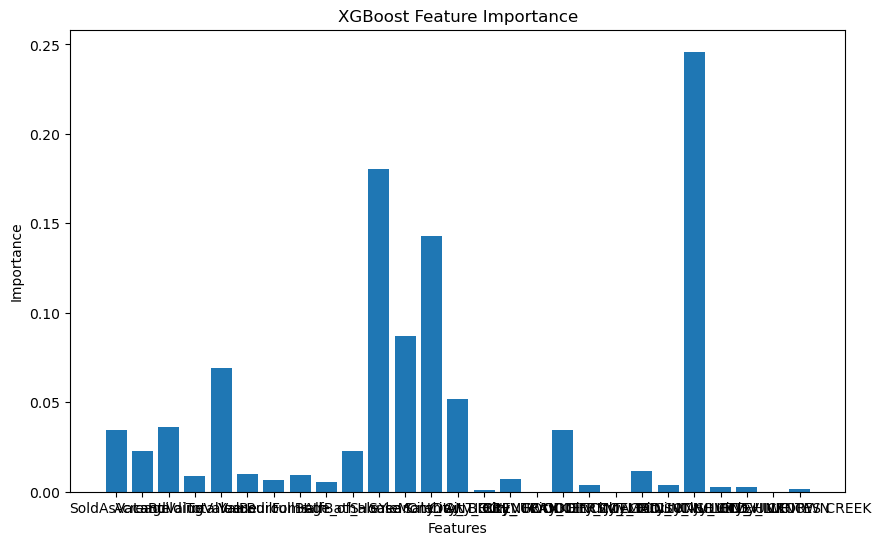

In [28]:
xgb_model = XGBRegressor(random_state=0)
xgb_model.fit(X, y)
plt.figure(figsize=(10, 6))
plt.bar(X.columns, xgb_model.feature_importances_)
plt.title('XGBoost Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [29]:
xgb_importances = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
xgb_importances = xgb_importances.sort_values(by='Importance', ascending=False)
print('\nXGBoost Feature Importance:')
print(xgb_importances)


XGBoost Feature Importance:
                 Feature  Importance
22       City_ NASHVILLE    0.245940
10              SaleYear    0.180260
12               SaleDay    0.142626
11             SaleMonth    0.086749
4             TotalValue    0.069017
13         City_ ANTIOCH    0.051994
2              LandValue    0.036257
17  City_ GOODLETTSVILLE    0.034483
0           SoldAsVacant    0.034215
1                Acreage    0.022744
9           Age_of_House    0.022592
20         City_ MADISON    0.011419
5              YearBuilt    0.009744
7               FullBath    0.009130
3          BuildingValue    0.008843
15       City_ BRENTWOOD    0.007296
6               Bedrooms    0.006743
8               HalfBath    0.005478
18       City_ HERMITAGE    0.003765
21    City_ MOUNT JULIET    0.003667
23     City_ NOLENSVILLE    0.002619
24     City_ OLD HICKORY    0.002357
26    City_ WHITES CREEK    0.001177
14        City_ BELLEVUE    0.000885
19         City_ JOELTON    0.000000
16       

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# XGB Regressor
xgb_model = XGBRegressor(random_state=0)
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)

# Model Evaluation
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

# Evaluate XGB Regressor
xgb_rmse, xgb_mae, xgb_mape = evaluate_model(y_test, xgb_preds)
print('\nXGBoost Regressor Metrics:')
print(f'RMSE: {xgb_rmse:.2f}')
print(f'MAE: {xgb_mae:.2f}')
print(f'MAPE: {xgb_mape:.2f}%')



XGBoost Regressor Metrics:
RMSE: 701413.59
MAE: 161135.92
MAPE: 105.51%
